In [1]:
import climostripe
import pandas as pd

### First, let's check out some stations

In [12]:
stations = climostripe.station_lookup('SP')

In [14]:
stations

,elevation,mindate,maxdate,latitude,name,datacoverage,id,elevationUnit,longitude
0,667.0,1920-01-01,2020-02-10,40.41170,"MADRID RETIRO, SP",0.9954,GHCND:SP000003195,METERS,-3.67810
1,185.0,1955-01-01,2020-02-10,38.88310,"BADAJOZ TALAVERA LA REAL, SP",1.0000,GHCND:SP000004452,METERS,-6.82920
2,7.0,1942-05-01,2020-02-10,36.66670,"MALAGA AEROPUERTO, SP",1.0000,GHCND:SP000006155,METERS,-4.48810
3,251.0,1916-04-01,2020-02-10,43.30750,"SAN SEBASTIAN IGUELDO, SP",0.9062,GHCND:SP000008027,METERS,-2.03920
4,4.0,1924-03-01,2020-02-10,41.29280,"BARCELONA AEROPUERTO, SP",0.9353,GHCND:SP000008181,METERS,2.06970
...,...,...,...,...,...,...,...,...,...
193,717.0,1973-01-01,1973-11-27,37.13300,"GRANADA ARMILLA, SP",0.9940,GHCND:SPM00008420,METERS,-3.61700
194,91.1,1958-01-02,2020-02-10,37.18333,"MORON DE LA FRONTERA, SP",0.7870,GHCND:SPW00013024,METERS,-5.60000
195,25.6,1958-10-01,2020-02-10,36.65000,"ROTA NAS, SP",0.7108,GHCND:SPW00013025,METERS,-6.35000
196,263.0,1957-07-01,2020-02-10,41.66667,"ZARAGOZA, SP",0.7506,GHCND:SPW00014010,METERS,-1.03333


### We want good data coverage, so we choose one of the stations at random... well not really...

In [15]:
stations_filtered = stations.query('datacoverage == 1 and mindate <  "1920-01-01"')

In [16]:
stations_filtered

,elevation,mindate,maxdate,latitude,name,datacoverage,id,elevationUnit,longitude
100,412.0,1913-08-06,2014-01-31,41.4181,"BARCELONA FABRA OBSERVATORY, SP",1.0,GHCND:SPE00155259,METERS,2.1239


In [11]:
climostripe.getdata?

Signature: climostripe.getdata(stationid, startyear, endyear)
Docstring:
This function grabs min and max daily temperature data for a chosen station from NOAA GHCND climate dataset.
It then calculates the average temperature over a chosen date range.

Parameters:
    - stationid:  A string of the GHCND station identifier (ex. GHCND:UK000000000)
    - startyear:  Integer of first year of date range (ex. 1900)
    - endyear:    Integer of last year of date range (ex. 2019)

Returns:
    Pandas dataframe of daily mean temperatures (TAvg)
File:      ~/git_repos/ATMS597_Project2/climostripe.py
Type:      function


In [17]:
climostripe.getdata(stations_filtered.id.values, 2010, 2011)

'Gathering data for 2011-01-01'

,TAvg
date,
2010-01-01,8.60
2010-01-02,6.10
2010-01-03,8.45
2010-01-04,7.20
2010-01-05,7.35
...,...
2011-12-27,10.20
2011-12-28,10.40
2011-12-29,9.15


## That took a long time... let's load in some data we downloaded previously!

## It is stored in the /data directory within the repo

In [2]:
df = climostripe.read_csv('data/barcelona_sp.csv')

In [19]:
df.head()

,TAvg
date,
1914-01-01,-1.7
1914-01-02,0.0
1914-01-03,0.5
1914-01-04,4.3
1914-01-05,4.3


In [20]:
df.tail()

,TAvg
date,
2013-12-27,10.00
2013-12-28,12.05
2013-12-29,8.30
2013-12-30,7.10
2013-12-31,8.75


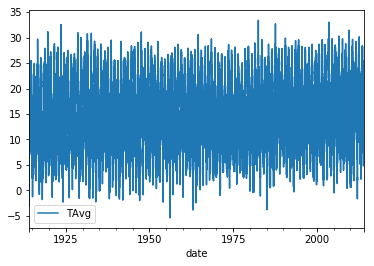

In [21]:
df.plot()

## That doesn't look nice... let's use Ed Hawkins'(s) method...
---

### Yearly

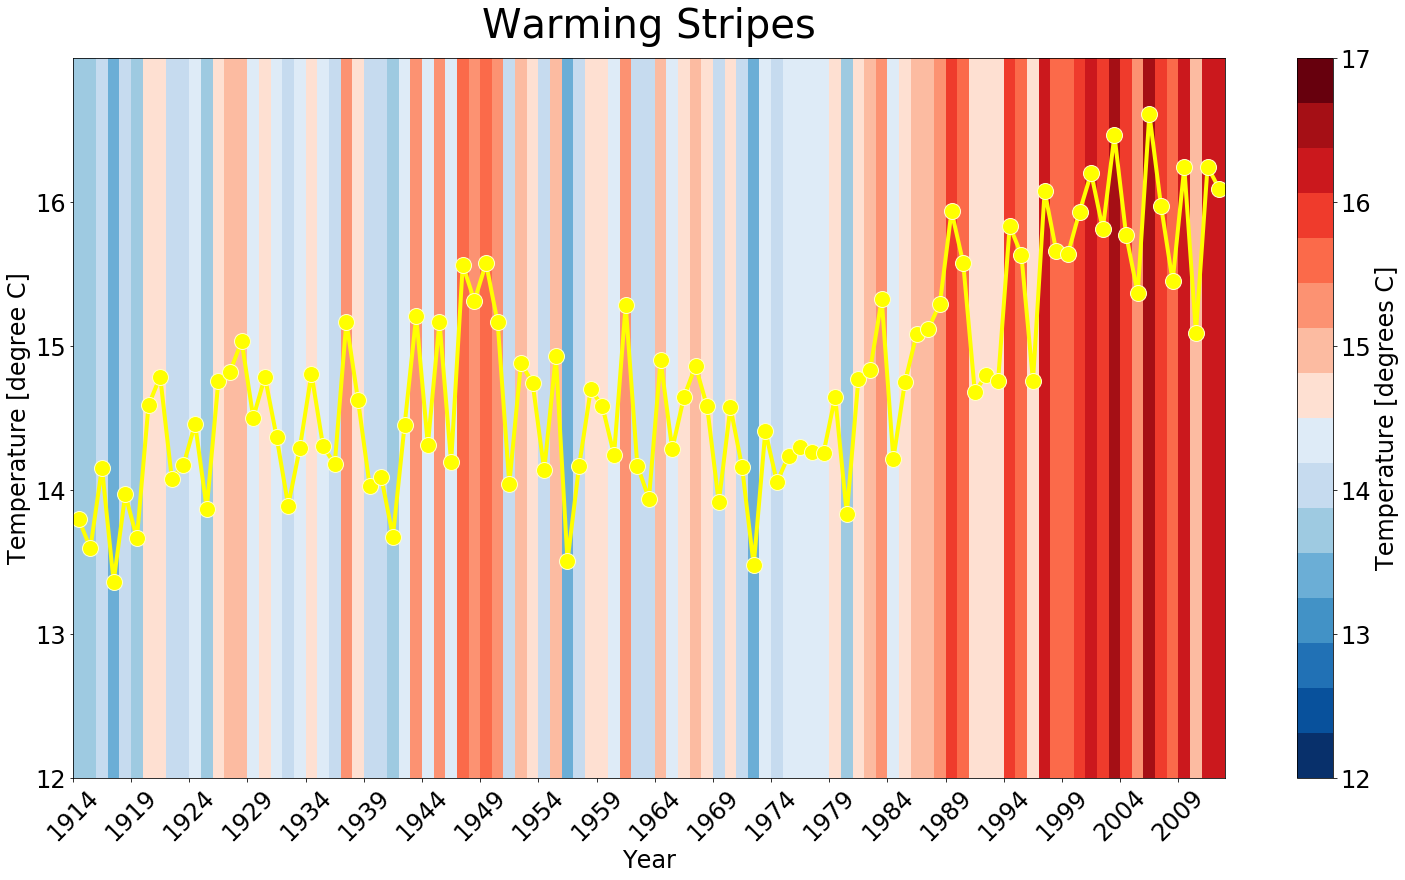

In [5]:
climostripe.plot(df, '1913-01-01', '2019-01-01', 'yearly', plot_line=True)

### Monthly

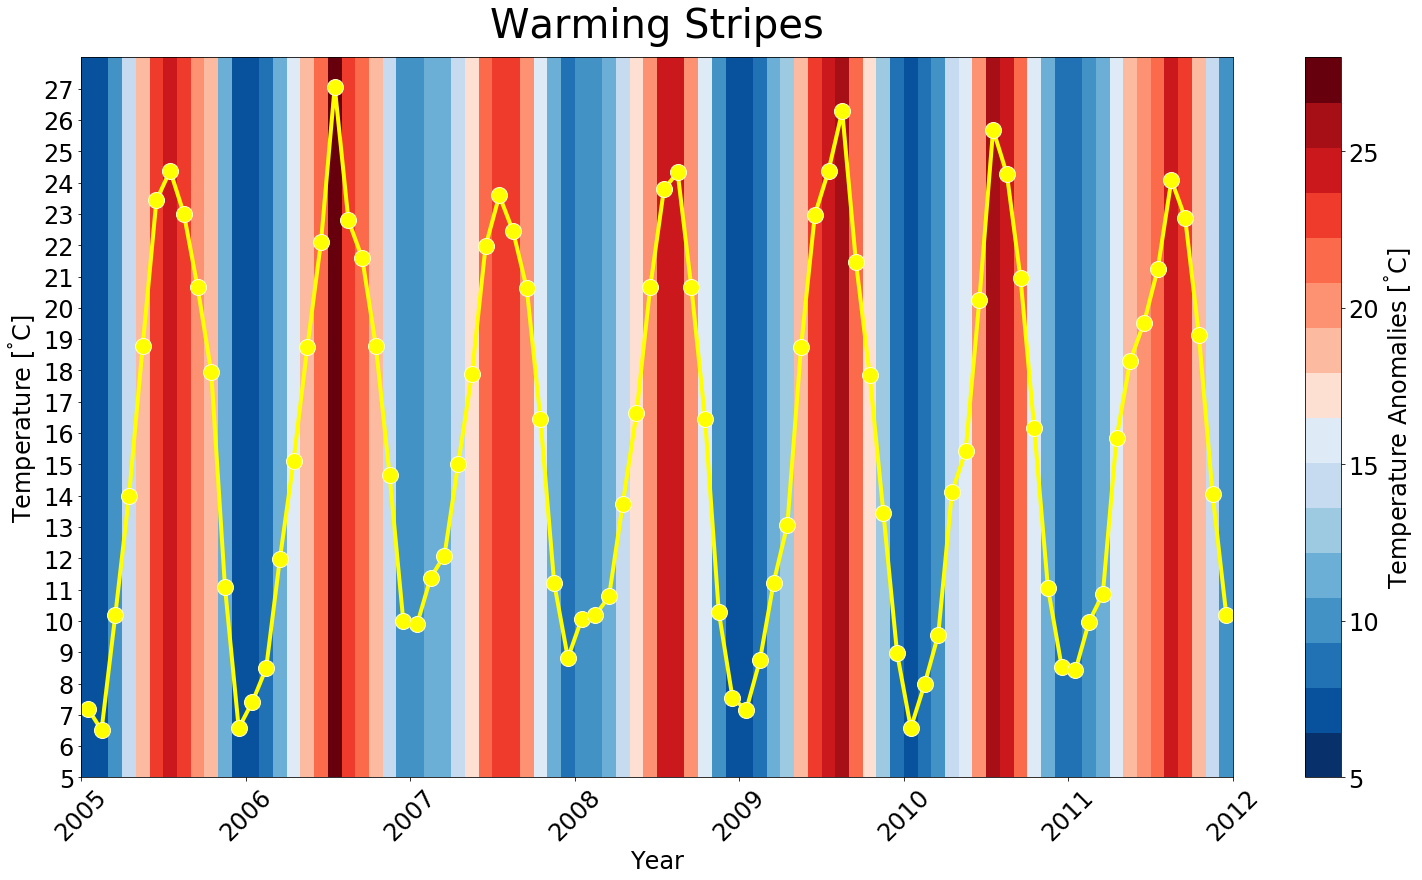

In [26]:
climostripe.plot(df, '2005-01-01', '2012-01-01', 'monthly', savefig=True, figtitle='weekly.png')

### Weekly

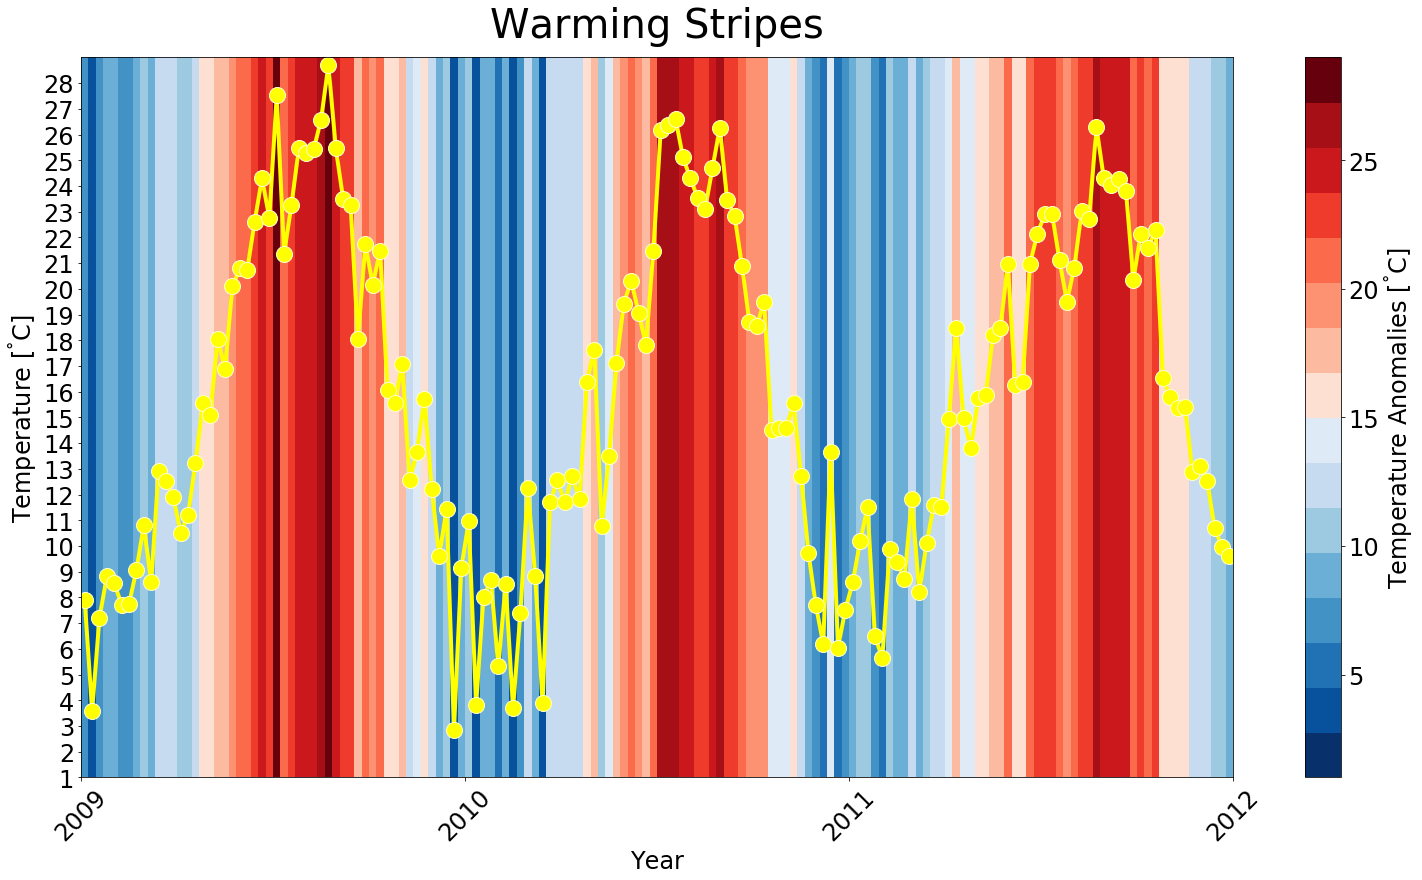

In [27]:
climostripe.plot(df, '2009-01-01', '2012-01-01', 'weekly')

## Don't forget the plot_line and savefig functionality